<h1> Data Wrangling

In [1]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing the dataset
stats = pd.read_csv('hour.csv')

In [3]:
#Shape of dataset
stats.shape

(17379, 17)

<h2> The dataset contains more than 17K records with 17 features

In [4]:
# top 3 rows from the dataset
stats.head(3)

instant  dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  1/1/11       1   0     1   0        0        6           0   
1        2  1/1/11       1   0     1   1        0        6           0   
2        3  1/1/11       1   0     1   2        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32

In [5]:
#finding if any nulls and data types of the features
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<h3> Renaming the columns, Type casting the attributes 

In [6]:
stats.rename(columns = {'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday': 'is_holiday',
                       'workingday': 'is_workingday',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity', 
                       'mnth': 'month',
                       'cnt': 'total_count',
                       'hr': 'hour',
                       'yr': 'year'}, inplace = True)

In [7]:
#type casting the attributes
stats['datetime'] = pd.to_datetime(stats.datetime)#dae time conversion
# categorical variables
stats['season'] = stats.season.astype('category')
stats['is_holiday'] = stats.is_holiday.astype('category')
stats['weekday'] = stats.weekday.astype('category')
stats['weather_condition'] = stats.weather_condition.astype('category')
stats['is_workingday'] = stats.is_workingday.astype('category')
stats['month'] = stats.month.astype('category')
stats['year'] = stats.year.astype('category')
stats['hour'] = stats.hour.astype('category')

<h1> Exploratory Data Analysis / Inferential Statistics

[Text(0.5,1,u'Season Wise Hourly Distribution of Bike Rental Counts')]

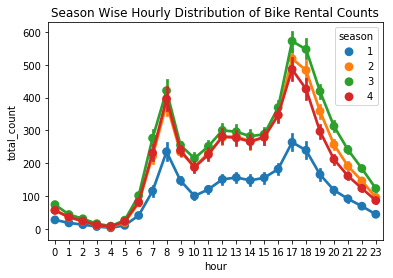

In [8]:
fig, ax = plt.subplots()
sn.pointplot(data = stats[['hour', 'total_count', 'season']], x= 'hour', y = 'total_count', hue = 'season', ax= ax)
ax.set(title = "Season Wise Hourly Distribution of Bike Rental Counts")

<B> Season 1 = Spring, 2 = Summer, 3= Fall, 4=Winter. Above graph shows similar trends for all seasons with counts peaking in the morning between 
7 -9 AM and in the evening between 4-6 PM for the reason those are business hours. The counts are 
lowest for spring season (Legend 1) while highest for Fall (Legend 3) across 24 hours  </B>

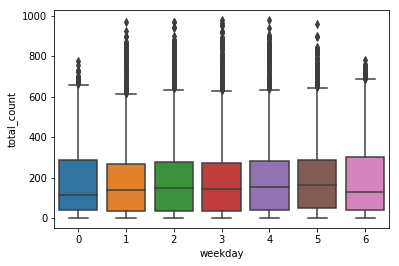

In [9]:
vis2 = sn.boxplot(data=stats, x='weekday', y='total_count')

<b> Weekday 0= Sunday, 1= Monday, 2= Tuesday & so on. During weekdays Mon -Fri, I see median of Bike REntal count is similar as opposed to weekends.

<B> Rental Duration Variation Across a Quarter

[Text(0.5,1,u'Month Wise Hourly Distribution of Bike Rental Counts')]

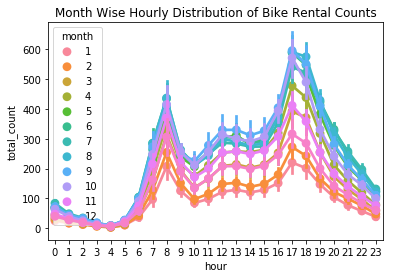

In [10]:
fig, ax = plt.subplots()
sn.pointplot(data = stats[['hour', 'total_count', 'month']], x= 'hour', y = 'total_count', hue = 'month', ax= ax)
ax.set(title = "Month Wise Hourly Distribution of Bike Rental Counts")

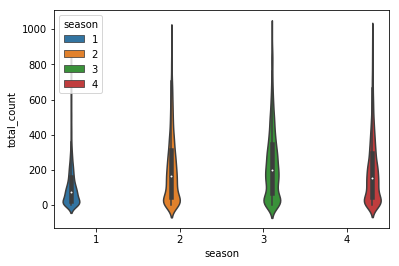

In [11]:
z = sn.violinplot(data=stats, x='season', y= 'total_count', hue = 'season')

<B> By above plot, spring season is when higher probability 
that members of the population will take on the same as median value of
population count i.e. ~150. Rest all seasons show skinny distribution across

<B> Finding Outliers in the Dataset by User Type, Temperature and Windspeed using Box Plots

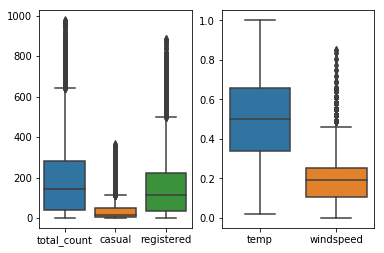

In [12]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
sn.boxplot(data = stats[['total_count', 'casual', 'registered']], ax = ax1)
sn.boxplot(data = stats[['temp', 'windspeed']], ax = ax2)

<B> The total, casual & registered type users show sizeable number of outlier values, 
however casual show lower numbers though. For weather attributes 
of temperature and wind speed, we see outliers only in the case of windspeed.

[Text(0,0.5,u'Count'),
 Text(0.5,0,u'Week Day'),
 Text(0.5,1,u'Box Plot On Count Across Week Days')]

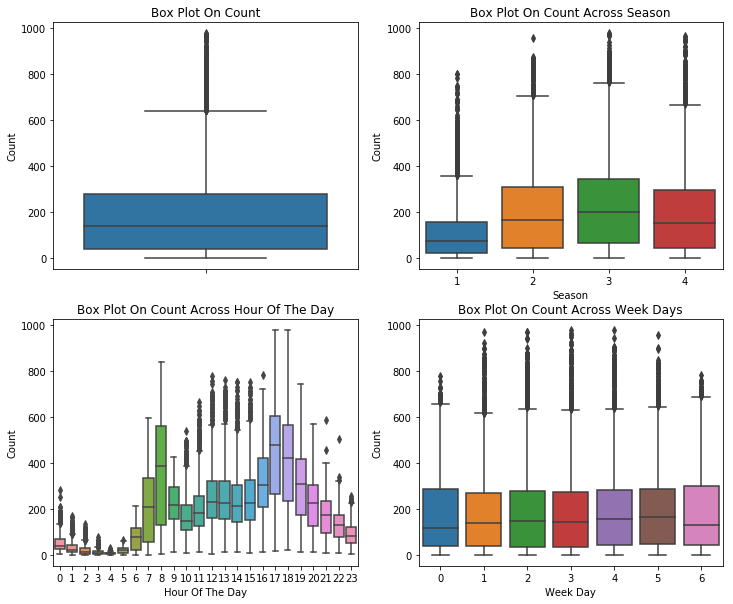

In [13]:
# OUTLIER Analysis
import seaborn as sn

fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=stats,y="total_count",orient="v",ax=axes[0][0])
sn.boxplot(data=stats,y="total_count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=stats,y="total_count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=stats,y="total_count",x="weekday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Week Day', ylabel='Count',title="Box Plot On Count Across Week Days")

<B>Outliers Analysis</b>
At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.

<h1>Correlation Analysis

One common to understand how a dependent variable is influenced by features (numerical) is to find a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
"atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
"Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.
Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

In [14]:
corrMatt = stats[["temp","atemp","casual","registered","humidity","windspeed","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<B> Correlation between Bike Rental Volume (total_count) and 'registered' user type is the highest.
Followed by 'casual' user type. I will explore this dependency of Bike rental volume by User Type in Null Hypothesis under Inferential statistics coming later in EDA. There is moderate collinearity between 'total_count' and 'temp'(temperature)too.

In [15]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="total_count", data=stats,ax=ax1)
sn.regplot(x="windspeed", y="total_count", data=stats, ax=ax2)
sn.regplot(x="humidity", y="total_count", data=stats,ax=ax3)

<b> There is direct positive relation between Bike Rental volume(total_count) vs 'temp' while negative relation with 'windspeed'

<H1>Histogram to show volume of bike rental counts frequency

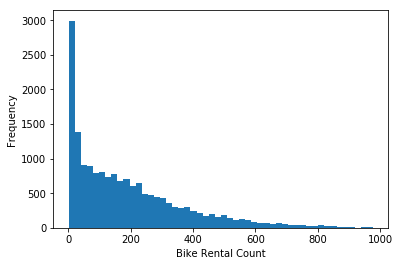

In [16]:
#sn.set()
_ = plt.hist(stats['total_count'], bins=50)
plt.xlabel("Bike Rental Count")
plt.ylabel("Frequency")
plt.show()

<h1> Beeswarm plot

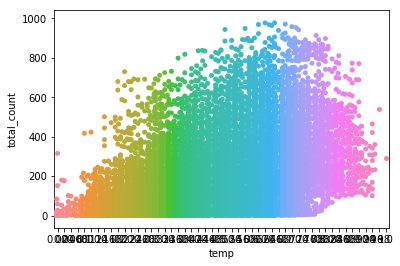

In [17]:

_ = sn.swarmplot(x='temp', y ='total_count', data = stats)

plt.show()

<H1> Inferential Statistics Begin:
Plotting ECDF Empirical Cumulative Distribution Function

17379
[5.75407101e-05 1.15081420e-04 1.72622130e-04 ... 9.99884919e-01
 9.99942459e-01 1.00000000e+00]


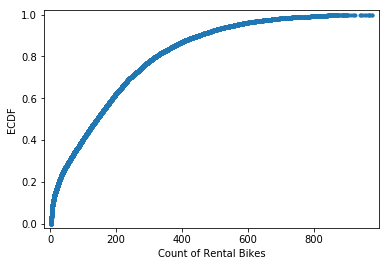

In [18]:
n= len(stats)
print(n)
x = np.sort(stats['total_count'])
y = np.arange(1,len(x)+1)/float(len(x)) 
print (y)

_= plt.plot(x, y, marker = '.', linestyle = 'none')
_= plt.xlabel('Count of Rental Bikes')
_= plt.ylabel('ECDF')
_= plt.margins(.02)

plt.show()

In [19]:
# Checking ECDF Distribution of Bike Rental Count across two years(2011 & 2012) and theoretical samples of data
def ecdf(data):
    x= np.sort(data)
    n= float(len(data))
    y = np.arange(1, n+1)/n
    return x,y

%matplotlib inline
plt.figure(figsize=(25,20))

# Seed the random number generator:
np.random.seed(15)
#Sample data for theortical normal dist
samples = np.random.normal(np.mean(stats.total_count), np.std(stats.total_count), size=10000)
samples

array([132.81220418, 251.00335526, 161.18402663, ..., 325.85950651,
        40.67549713, 183.19979447])

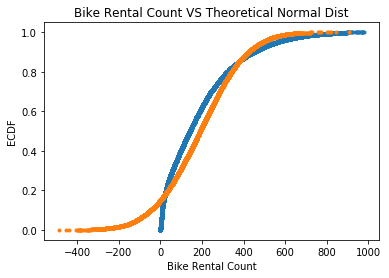

In [20]:
#find ecdf of data
x_count, y_count = ecdf(stats.total_count)
x_theor, y_theor = ecdf(samples)

fig = plt.plot(x_count, y_count, marker='.', linestyle='none')
fig = plt.plot(x_theor, y_theor, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.title('Bike Rental Count VS Theoretical Normal Dist')
fig = plt.xlabel('Bike Rental Count')
fig = plt.ylabel('ECDF')

# Save and display the plots:
#plt.savefig('reports/figures/cdf_body_temps.png')
plt.show()

<b>Compare the distribution of the data to the theoretical distribution of the data. This is done by comparing the ecdf First define a function for computing the ecdf from a data set. Next use np.random.normal to sample the theoretical normal distribution and overlay the ecdf of both data sets to compare distribution. We see how closely the real data set follows the theoretical normal distribution curve. 


In [21]:
np.percentile(stats['total_count'], [25, 50, 75, 90, 98, 100])

array([ 40. , 142. , 281. , 451.2, 690. , 977. ])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1d2db910>]],
      dtype=object)

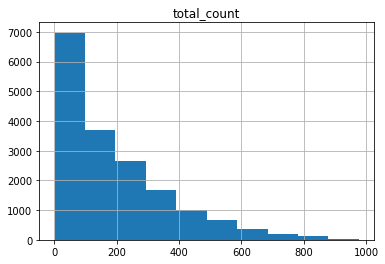

In [22]:
pd.DataFrame.hist(stats, column='total_count')

<b>The sampling distribution is the form of a normal distribution.


In [23]:
np.var(stats['total_count'])

32899.56793087754

In [24]:
np.std(stats['total_count'])

181.38238043116962

In [25]:
#Covariance how two quantities vary together
np.cov(stats['total_count'], stats['temp'])

array([[3.29014611e+04, 1.41375997e+01],
       [1.41375997e+01, 3.70778598e-02]])

In [26]:
#Pearson Coorrelation Coefficient
np.corrcoef(stats['total_count'], stats['temp'])

array([[1.        , 0.40477228],
       [0.40477228, 1.        ]])

<b> Is the sample size large? Are the observations independent?

In [27]:
print('We have', len(stats), 'samples across', len(list(stats.columns)), 'features.')
# confirmed here: https://ww2.amstat.org/publications/jse/datasets/normtemp.txt

print(stats.groupby(['season']).count(), stats.info())

#Additionally, by calling stats.groupby(['season']).count(), 
#we can see that even if divided by Seasons the data is mutually exclusive 
#represented and therefore entries are independent of one another.

('We have', 17379, 'samples across', 17, 'features.')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
rec_id               17379 non-null int64
datetime             17379 non-null datetime64[ns]
season               17379 non-null category
year                 17379 non-null category
month                17379 non-null category
hour                 17379 non-null category
is_holiday           17379 non-null category
weekday              17379 non-null category
is_workingday        17379 non-null category
weather_condition    17379 non-null category
temp                 17379 non-null float64
atemp                17379 non-null float64
humidity             17379 non-null float64
windspeed            17379 non-null float64
casual               17379 non-null int64
registered           17379 non-null int64
total_count          17379 non-null int64
dtypes: category(8), datetime64[ns](1), float64(4), int64(4)
memory usage: 1.3 MB


<h1> Visualizing ECDF using bootstrap samples

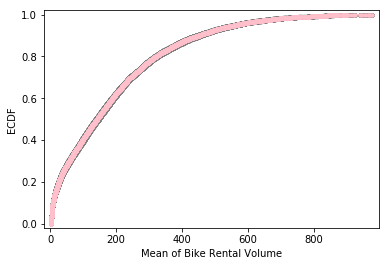

In [28]:
for i in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(stats['total_count'], size=len(stats))

    # Compute and plot ECDF from bootstrap sample
    x = np.sort(bs_sample)
    y = np.arange(1,len(x)+1)/float(len(x)) 


    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x = np.sort(stats['total_count'])
y = np.arange(1,len(x)+1)/float(len(x)) 

_ = plt.plot(x, y, marker='.', color= 'pink')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('Mean of Bike Rental Volume')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

<b> By graphically displaying the bootstrap samples with an ECDF, I see how bootstrap sampling allows probabilistic distribution of data.

<h1> Confidence Interval

<B> Step 1: Build a function to create a bootstrap replicate

In [29]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(stats['total_count'], size=len(stats['total_count'])))
#np.random.choice() works on linear model

<b> Step 2: Another function to generate multiple such bootstrap samples

In [30]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

<b> Step 3: Plot the histogram for bootstrap replicates

In [31]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(stats['total_count'], np.mean, 10000)

# Compute and print SEM Standard Error of the Mean
sem = np.std(stats['total_count']) / np.sqrt(len(stats['total_count']))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean bike rental count')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

1.3758868046313306
1.383151172409254


<b> This is bootstrap estimate of the probability distribution function of the mean Bike Rental Count at the Capital Bikeshare System. Remember, we are estimating the mean Bike Rental Count we would get if the Capital Bikeshare System could repeat all of the measurements from 2011 to 2012 over and over again. This is a probabilistic estimate of the mean. I plot the PDF as a histogram, and I see that it is not Normal as it has slightly longer left tail.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the standard error of the mean, or SEM, is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set.
Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

<b> Assuming 95% Confidence interval i.e. give the 2.5th and 97.5th percentile of bootstrap replicates is stored as bs_replicates

In [32]:
np.percentile(bs_replicates, [2.5, 97.5])

array([186.82940186, 192.19181915])

<b> The above steps may be repeated to show for Variance function as well

<B> Extending Confidence Interval Concept to Pairs Bootstrap

In [33]:
#Finding pairs bootstrap for slope & intercept of a linear function between Bike REntal Count and Registered User Type
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(stats['registered'], stats['total_count'], 1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5, 97.5]))
# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50, normed=True)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

[1.15911791 1.17070014]


In [34]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(1000):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
#_ = plt.show()

# Label axes, set the margins, and show the plot
_ = plt.xlabel('Registered User')
_ = plt.ylabel('Bike Rental Count')
plt.margins(0.02)
plt.show()

<h1> Hypothesis Testing

<B> Null Hypothesis- 
There is no significant difference between registered and casual user type mean on Bike Rental Count.</B>

H0:μregistered−μcasual=0
 
Significance Level: 95% Confidence  α=0.05

<B> Alternate Hypothesis -

 There is significant difference between registered and casual user type mean on Bike Rental Count
HA : μregistered−μcasual != 0


In [35]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(
                                    stats['registered'], stats['casual'])

    # Compute and plot ECDF from permutation sample 1 
    x1 = np.sort(perm_sample_1)
    y1 = np.arange(1,len(x1)+1)/float(len(x1)) 
    
    # Compute and plot ECDF from permutation sample 2
    x2 = np.sort(perm_sample_2)
    y2 = np.arange(1,len(x2)+1)/float(len(x2))


    # Plot ECDFs of permutation sample
    _ = plt.plot(x1, y1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x2, y2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
# Compute and plot ECDF from original 'registered'
x11 = np.sort(stats['registered'])
y11 = np.arange(1,len(x11)+1)/float(len(x11)) 

_ = plt.plot(x11, y11, marker='.', color= 'red')

# Compute and plot ECDF from original 'casual'
x22 = np.sort(stats['casual'])
y22 = np.arange(1,len(x22)+1)/float(len(x22)) 

_ = plt.plot(x22, y22, marker='.', color= 'blue')
# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('User Type')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

<b> Permutation samples ECDFs overlap and give a purple haze. Few of the ECDFs from the permutation samples overlap with the observed Registered User type data towards right of the graph & even fewer overlap towards left, suggesting that the hypothesis is not commensurate with the data. Registered & Casual User Type are not identically distributed and do not influence data in similar way. So Null Hypothesis is not correct.

<h1> Finding Optimal Parameters & Residual Sum of Squares (RSS) if ECDF is not the right estimate of mean

<B> EDA of Bike Rental Count versus Registered User Type

In [36]:
print(np.corrcoef(stats['total_count'], stats['registered']))

[[1.         0.97215073]
 [0.97215073 1.        ]]


In [37]:
x=stats['registered']
y=stats['total_count']
_=plt.plot(x, y, marker ='.', linestyle ='none')

<b> Based on above Pearson Correlation coeeficient value ~1 and scatter plot, it is safe to assume Bike REntal Count vs Registered User Type to be linear continuous function. 
 <b>   Above calculated x, y will be continued in use for further inferential statistics below.

<B> Next steps be find optimal parameters, theoretical line, its line plot, initialize RSS for all possible values of slope(a), compute rss & plot

In [38]:
a, b= np.polyfit(x,y,1)
print('slope =', a, 'Bike Rental Count / percent registerd User Type')
print('intercept =', b, 'Bike Rental Count')

('slope =', 1.1650320363746498, 'Bike Rental Count / percent registerd User Type')
('intercept =', 10.296458231132737, 'Bike Rental Count')


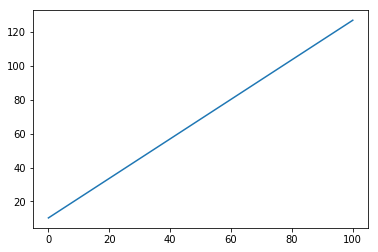

In [39]:
#Theoretical linear function t=a*s + b 
s = np.array([0,100])
t= a*s +b
_ = plt.plot(s,t)
plt.show()

In [40]:
#computing RSS
a_vals = np.linspace(0,1,200)
rss= np.empty_like(a_vals)

In [41]:
for i, a in enumerate(a_vals):
    rss[i]=np.sum((y - a * x -b)**2)
    
plt.plot(a_vals, rss,'_')
plt.xlabel('slope (Bike Rental Count / percent registerd User Type)')
plt.ylabel('sum of square of residuals')

Text(0,0.5,u'sum of square of residuals')

<b>minimum on the plot, that is the value of the slope (~1.16) that gives the minimum sum of the square of the residuals, is the same value I got when performing the regression above using np.polyfit(). Hence Bike Rental Count vs. User Type is a linear continuous function and so ECDF graphs to show Bike Rental Count distribution by User Types is correct and Null hypothesis i.e. User Type Casual & Registered carry similar influence on Bike Rental Count may be rejected.

In [42]:
# Save bike rental count by User Type:
reg_count = stats.registered
casual_count = stats.casual

# Sample Sizes:
n_reg = len(reg_count)
n_casual = len(casual_count)

# Sample Means:
M_reg = np.mean(reg_count)
M_casual = np.mean(casual_count)

print('Registered Sample Size:', n_reg, '\nRegistered User Type Mean:', M_reg)
print('\nCasual Sample Size:', n_casual, '\nCasual User Type Mean:', M_casual)

('Registered Sample Size:', 17379, '\nRegistered User Type Mean:', 153.78686920996606)
('\nCasual Sample Size:', 17379, '\nCasual User Type Mean:', 35.67621842453536)


There is a difference between the mean of registered and casual User Type in the sample data, but a statistical analysis will help determine if the difference is significant. Null Hypothesis: There is no significant difference between registered and casual user type mean on Bike Rental Count. $$H_0: \mu_{registered} - \mu_{casual} = 0$$ Significance Level: 95% Confidence $$\alpha = 0.05$$

In [43]:
# Define permutation functions:

def permutation_sample(data1, data2):
    """Return a permutation sample from two data sets."""

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    # Permute the concatenated array:
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two samples:
    permutation_sample_1 = permuted_data[:len(data1)]
    permutation_sample_2 = permuted_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):
    """Draw multiple permutation replicates."""

    # Initialize array of permutation replicates:
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates


def difference_of_means(data_1, data_2):
    """Return the difference in means of two arrays."""

    # The difference of means of data_1, data_2:
    return np.mean(data_1) - np.mean(data_2)

In [44]:
# Seed the random number generator:
np.random.seed(15)


# Compute difference of means:
empirical_difference = difference_of_means(reg_count, casual_count)

# Draw 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(reg_count, casual_count, difference_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means:
p = np.sum(permutation_replicates >= empirical_difference) / len(permutation_replicates)

# Print the results:
print('Difference of Means', empirical_difference)
print('p-value =', p)

('Difference of Means', 118.11065078543069)
('p-value =', 0)


In [61]:
from scipy import stats
# Save results of a two sample t-test:
t = stats.ttest_ind(reg_count, casual_count)[0]
p = stats.ttest_ind(reg_count, casual_count)[1]

print('t-statistic:', t)
print('p-value:', p)

('t-statistic:', 97.81332643791566)
('p-value:', 0.0)


In [62]:
# Print the quantiles of the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.025, df=65-1)), (stats.t.ppf(q=0.975, df=65-1)))

(-1.9977296536259739, 1.9977296536259734)


A two-sample t-test returned a t-statistic of 97.81 and p-value of 0.0, so here too, the null hypothesis is rejected. The difference in User Type count between Registered and Casual, though significant, is not extreme. Registered tend to have a higher Count.

In [63]:
#Importing the dataset
df = pd.read_csv('hour.csv')

In [64]:
df.rename(columns = {'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday': 'is_holiday',
                       'workingday': 'is_workingday',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity', 
                       'mnth': 'month',
                       'cnt': 'total_count',
                       'hr': 'hour',
                       'yr': 'year'}, inplace = True)

In [67]:
#type casting the attributes
df['datetime'] = pd.to_datetime(df.datetime)#dae time conversion
# categorical variables
df['season'] = df.season.astype('category')
df['is_holiday'] = df.is_holiday.astype('category')
df['weekday'] = df.weekday.astype('category')
df['weather_condition'] = df.weather_condition.astype('category')
df['is_workingday'] = df.is_workingday.astype('category')
df['month'] = df.month.astype('category')
df['year'] = df.year.astype('category')
df['hour'] = df.hour.astype('category')

In [70]:
# Define a function to compute the CDF:

def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = float(len(data))

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y


In [71]:
# Compute percentiles:
percentile = np.array([25,50,75])
reg_percentiles = np.percentile(df.registered, percentile)
casual_percentiles = np.percentile(df.casual, percentile)

# Compute ECDFs:
regx_count, regy_count = cdf(df.registered)
casualx_count, casualy_count = cdf(df.casual)

# Plot both ECDFs on the same plot:
fig = plt.plot(regx_count, regy_count, marker='.', linestyle='none')
fig = plt.plot(casualx_count, casualy_count, marker='.', linestyle='none')

# Overlay percentiles on each plot:
fig = plt.plot(reg_percentiles, percentile/100, marker='X', linestyle='none', color='black')
fig = plt.plot(casual_percentiles, percentile/100, marker='X', linestyle='none', color='black')

# Label axes and add legend and a title:
fig = plt.xlabel('User Type', fontsize=14)
fig = plt.ylabel('ECDF')
fig = plt.legend(('Registered User Type', 'Casual User Type', '25$^{th}$, 50$^{th}$, 75$^{th}$ Percentiles'), loc='center right')
fig = plt.title('Distribution of Registered and Casual User Type', fontsize=18)

# Save and display the plots:
#plt.savefig('reports/figures/bike_count_ditribution_by_user_type.png')
plt.show()


<B>Hence by above plot, we may reject the Null hypothesis since there is significant difference between Bike Rental Count distribution of Registered and Casual User Type. 